| Aspek | K-Nearest Neighbors (KNN) | Single Perceptron (Neural Network Awal) |
|--------|-----------------------------|-------------------------------------------|
| Konsep | Instance-based Learning, analogi dengan tetangga. | Matematis & Biologis, meniru neuron tunggal. |
| Proses "Belajar" | Tidak ada fase belajar eksplisit. Hanya menyimpan data. | Ada fase belajar eksplisit. Menemukan bobot (w) dan bias (b) yang optimal melalui proses seperti Gradient Descent. |
| Model | Tidak menghasilkan model. Prediksi berdasarkan data asli. | Menghasilkan model: **f(x) = activation(w·x + b)**. Setelah training, data training bisa dibuang. |
| Kecepatan | Training cepat, prediksi lambat. | Training lambat (iteratif), prediksi sangat cepat (hanya sekali kalkulasi). |
| Interpretasi | Mudah dijelaskan untuk K kecil ("karena 3 dari 5 tetangganya adalah A"). | Model (bobot) bisa diinterpretasi untuk melihat seberapa penting sebuah fitur. |
| Data Baru | Harus dibandingkan dengan seluruh dataset. | Cukup dijalankan melalui fungsi model yang sudah dilatih. |

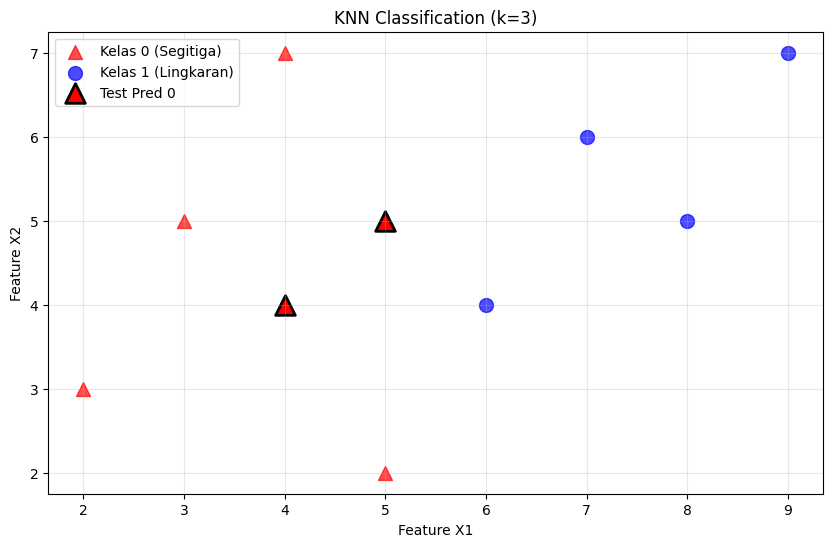

Hasil Prediksi:
Data test 1 [5 5] -> Prediksi: Kelas 0
Data test 2 [4 4] -> Prediksi: Kelas 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Data training sederhana
# Fitur: [x, y], Label: 0 = Segitiga, 1 = Lingkaran
X_train = np.array([[2, 3], [3, 5], [4, 7], [5, 2], [6, 4], [7, 6], [8, 5], [9, 7]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # 0=Merah, 1=Biru

# Data test
X_test = np.array([[5, 5], [4, 4]])

def euclidean_distance(point1, point2):
    """Menghitung jarak Euclidean antara dua titik"""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    """Prediksi menggunakan algoritma KNN"""
    predictions = []
    
    for test_point in X_test:
        # Hitung jarak ke semua titik training
        distances = []
        for i, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[i]))
        
        # Urutkan berdasarkan jarak dan ambil k terdekat
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]
        
        # Ambil label dari k tetangga terdekat
        k_nearest_labels = [label for _, label in k_nearest]
        
        # Voting mayoritas
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    
    return predictions

# Prediksi
k = 3
predictions = knn_predict(X_train, y_train, X_test, k)

# Visualisasi
plt.figure(figsize=(10, 6))

# Plot data training
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           c='red', marker='^', s=100, label='Kelas 0 (Segitiga)', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
           c='blue', marker='o', s=100, label='Kelas 1 (Lingkaran)', alpha=0.7)

# Plot data test dengan hasil prediksi
colors = ['red' if pred == 0 else 'blue' for pred in predictions]
markers = ['^' if pred == 0 else 'o' for pred in predictions]
labels = ['Test Pred 0' if pred == 0 else 'Test Pred 1' for pred in predictions]

for i, (point, color, marker, label) in enumerate(zip(X_test, colors, markers, labels)):
    plt.scatter(point[0], point[1], c=color, marker=marker, s=200, 
               edgecolors='black', linewidth=2, label=label if i == 0 else "")

plt.title(f'KNN Classification (k={k})')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Hasil Prediksi:")
for i, (point, pred) in enumerate(zip(X_test, predictions)):
    print(f"Data test {i+1} {point} -> Prediksi: Kelas {pred}")

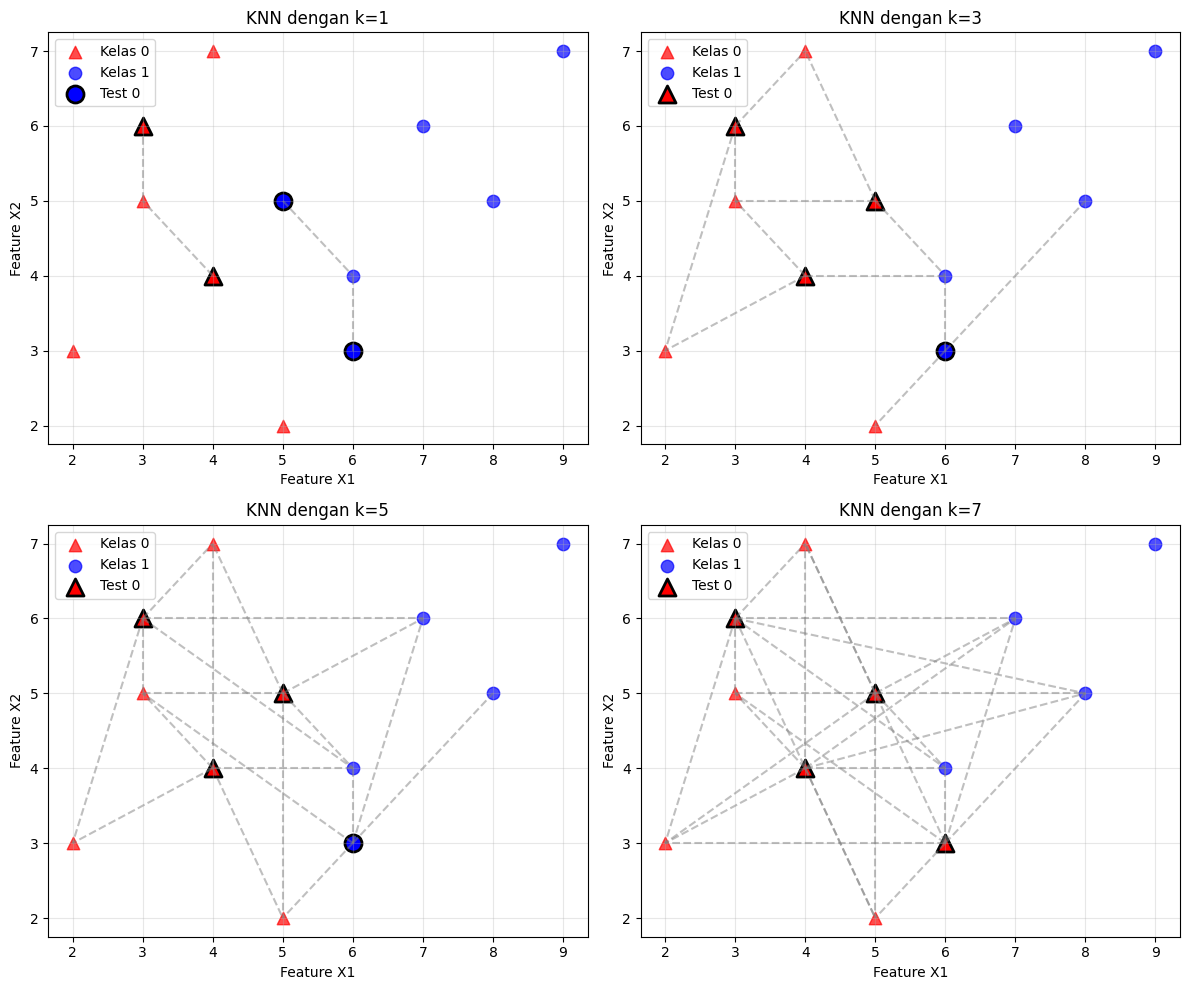

In [2]:
# Data yang sama seperti contoh 1
def visualize_knn_with_different_k(X_train, y_train, X_test, k_values=[1, 3, 5, 7]):
    """Visualisasi KNN dengan nilai K yang berbeda"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()
    
    for idx, k in enumerate(k_values):
        predictions = knn_predict(X_train, y_train, X_test, k)
        
        # Plot data training
        axes[idx].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
                         c='red', marker='^', s=80, label='Kelas 0', alpha=0.7)
        axes[idx].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
                         c='blue', marker='o', s=80, label='Kelas 1', alpha=0.7)
        
        # Plot data test
        colors = ['red' if pred == 0 else 'blue' for pred in predictions]
        markers = ['^' if pred == 0 else 'o' for pred in predictions]
        
        for i, (point, color, marker) in enumerate(zip(X_test, colors, markers)):
            axes[idx].scatter(point[0], point[1], c=color, marker=marker, s=150, 
                            edgecolors='black', linewidth=2, label=f'Test {i}' if i == 0 else "")
            
            # Gambar garis ke k tetangga terdekat
            distances = []
            for j, train_point in enumerate(X_train):
                dist = euclidean_distance(point, train_point)
                distances.append((dist, train_point, y_train[j]))
            
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:k]
            
            for dist, nearest_point, label in k_nearest:
                axes[idx].plot([point[0], nearest_point[0]], 
                              [point[1], nearest_point[1]], 
                              'gray', alpha=0.5, linestyle='--')
        
        axes[idx].set_title(f'KNN dengan k={k}')
        axes[idx].set_xlabel('Feature X1')
        axes[idx].set_ylabel('Feature X2')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

# Test dengan titik baru
X_test_multi = np.array([[5, 5], [4, 4], [6, 3], [3, 6]])
visualize_knn_with_different_k(X_train, y_train, X_test_multi)

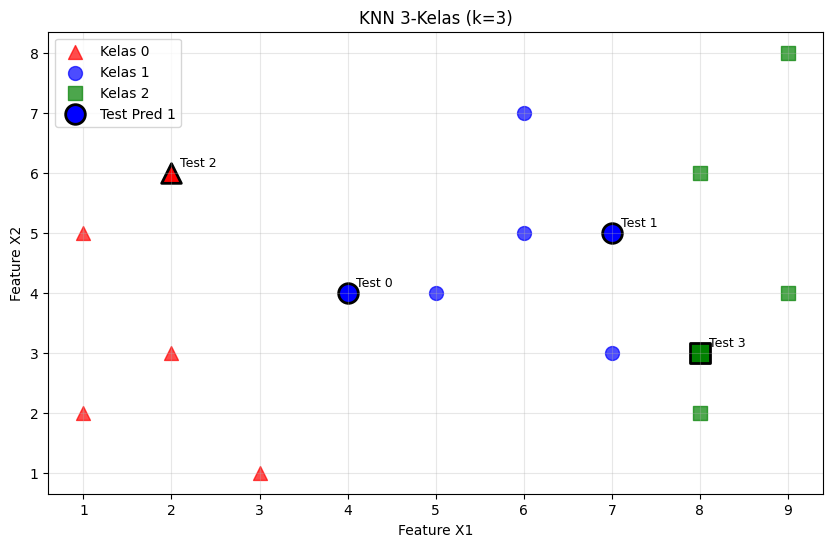

Hasil Prediksi 3-Kelas:
Data test 1 [4 4] -> Prediksi: Kelas 1 (Kelas 1)
Data test 2 [7 5] -> Prediksi: Kelas 1 (Kelas 1)
Data test 3 [2 6] -> Prediksi: Kelas 0 (Kelas 0)
Data test 4 [8 3] -> Prediksi: Kelas 2 (Kelas 2)


In [3]:
# Data training dengan 3 kelas
X_train_3class = np.array([
    [1, 2], [2, 3], [3, 1], [1, 5],  # Kelas 0
    [5, 4], [6, 5], [7, 3], [6, 7],  # Kelas 1  
    [8, 2], [9, 4], [8, 6], [9, 8]   # Kelas 2
])
y_train_3class = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

# Data test
X_test_3class = np.array([[4, 4], [7, 5], [2, 6], [8, 3]])

# Prediksi
k = 3
predictions_3class = knn_predict(X_train_3class, y_train_3class, X_test_3class, k)

# Visualisasi
plt.figure(figsize=(10, 6))

# Warna dan marker untuk setiap kelas
colors = ['red', 'blue', 'green']
markers = ['^', 'o', 's']
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Plot data training
for class_id in range(3):
    mask = y_train_3class == class_id
    plt.scatter(X_train_3class[mask, 0], X_train_3class[mask, 1], 
               c=colors[class_id], marker=markers[class_id], s=100, 
               label=labels[class_id], alpha=0.7)

# Plot data test
for i, (point, pred) in enumerate(zip(X_test_3class, predictions_3class)):
    plt.scatter(point[0], point[1], c=colors[pred], marker=markers[pred], s=200,
               edgecolors='black', linewidth=2, label=f'Test Pred {pred}' if i == 0 else "")
    
    # Tambahkan teks untuk titik test
    plt.annotate(f'Test {i}', (point[0] + 0.1, point[1] + 0.1), fontsize=9)

plt.title(f'KNN 3-Kelas (k={k})')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Hasil Prediksi 3-Kelas:")
for i, (point, pred) in enumerate(zip(X_test_3class, predictions_3class)):
    print(f"Data test {i+1} {point} -> Prediksi: Kelas {pred} ({labels[pred]})")

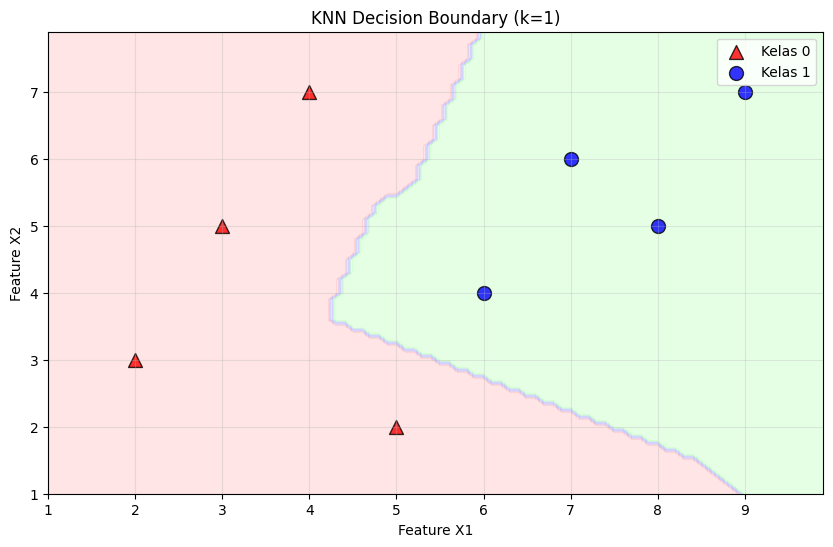

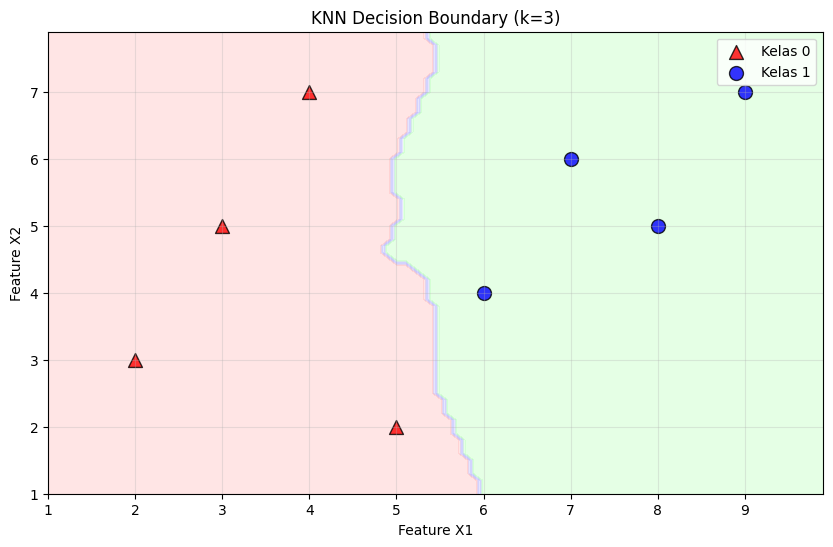

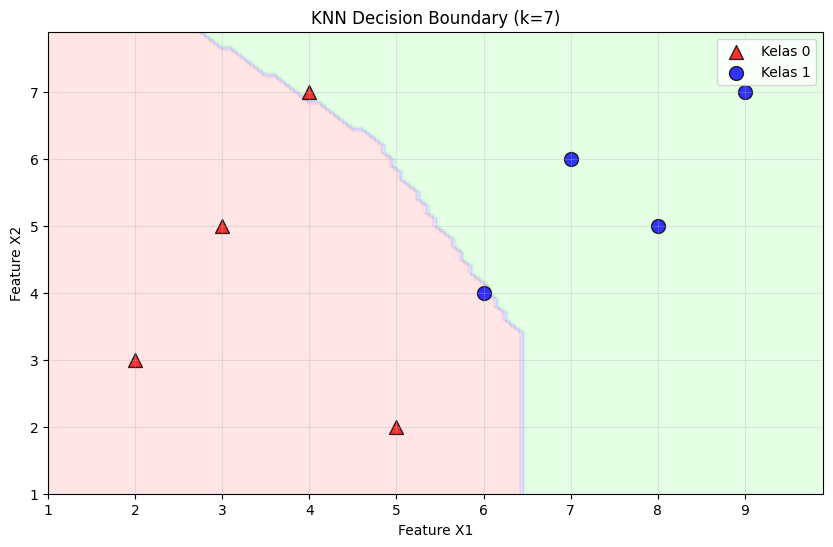

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary_knn(X_train, y_train, k=3, resolution=0.1):
    """Plot decision boundary untuk KNN"""
    # Buat mesh grid
    x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    # Prediksi untuk setiap titik di mesh grid
    Z = np.array(knn_predict(X_train, y_train, np.c_[xx1.ravel(), xx2.ravel()], k))
    Z = Z.reshape(xx1.shape)
    
    # Plot
    plt.figure(figsize=(10, 6))
    
    # Plot decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap_light)
    
    # Plot data training
    colors = ['red', 'blue', 'green']
    markers = ['^', 'o', 's']
    
    for class_id in range(len(np.unique(y_train))):
        mask = y_train == class_id
        plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                   c=colors[class_id], marker=markers[class_id], s=100,
                   label=f'Kelas {class_id}', edgecolors='black', alpha=0.8)
    
    plt.title(f'KNN Decision Boundary (k={k})')
    plt.xlabel('Feature X1')
    plt.ylabel('Feature X2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Gunakan data 2 kelas dari contoh 1
plot_decision_boundary_knn(X_train, y_train, k=1)
plot_decision_boundary_knn(X_train, y_train, k=3)
plot_decision_boundary_knn(X_train, y_train, k=7)